<a href="https://colab.research.google.com/github/KelvinLam05/bellabeat_case_study/blob/main/bellabeat_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About the company**

Bellabeat is a high-tech company that manufactures health-focused smart products. Founded in 2013 by artist Urška Sršen and mathematician Sando Mur, the company has many products carefully designed to monitor activity, stress, sleep, and reproductive data to help women better understand how their bodies work and make healthier choices. While small in size, Bellabeat has quickly positioned itself as a tech-driven wellness company for women. Chief Creative Officer, Urška Sršen, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

**Business task**

Focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers use non-Bellabeat smart devices.

**Load packages and data**

In [656]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [657]:
# Load datasets
daily_activity = pd.read_csv('/content/daily_activity_merged.csv')
sleep_day = pd.read_csv('/content/sleep_day_merged.csv')
weight_info = pd.read_csv('/content/weight_logInfo_merged.csv')
hourly_intensities = pd.read_csv('/content/hourly_intensities_merged.csv')

In [658]:
# Rename Pandas columns to lower case
daily_activity.columns = daily_activity.columns.str.lower()
sleep_day.columns = sleep_day.columns.str.lower()
weight_info.columns = weight_info.columns.str.lower()
hourly_intensities.columns = hourly_intensities.columns.str.lower()

In [659]:
# Examine the data
daily_activity.head()

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [660]:
sleep_day.head()

,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [661]:
weight_info.head()

,id,date,weightkg,weightpounds,fat,bmi,ismanualreport,logid
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [662]:
hourly_intensities.head()

,id,activityhour,totalintensity,averageintensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [663]:
# Overview of all variables, their datatypes
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        940 non-null    int64  
 1   activitydate              940 non-null    object 
 2   totalsteps                940 non-null    int64  
 3   totaldistance             940 non-null    float64
 4   trackerdistance           940 non-null    float64
 5   loggedactivitiesdistance  940 non-null    float64
 6   veryactivedistance        940 non-null    float64
 7   moderatelyactivedistance  940 non-null    float64
 8   lightactivedistance       940 non-null    float64
 9   sedentaryactivedistance   940 non-null    float64
 10  veryactiveminutes         940 non-null    int64  
 11  fairlyactiveminutes       940 non-null    int64  
 12  lightlyactiveminutes      940 non-null    int64  
 13  sedentaryminutes          940 non-null    int64  
 14  calories  

In [664]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  413 non-null    int64 
 1   sleepday            413 non-null    object
 2   totalsleeprecords   413 non-null    int64 
 3   totalminutesasleep  413 non-null    int64 
 4   totaltimeinbed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [665]:
weight_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              67 non-null     int64  
 1   date            67 non-null     object 
 2   weightkg        67 non-null     float64
 3   weightpounds    67 non-null     float64
 4   fat             2 non-null      float64
 5   bmi             67 non-null     float64
 6   ismanualreport  67 non-null     bool   
 7   logid           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [666]:
hourly_intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                22099 non-null  int64  
 1   activityhour      22099 non-null  object 
 2   totalintensity    22099 non-null  int64  
 3   averageintensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


**Changing date strings to datetime**

In [667]:
daily_activity['activitydate'] = pd.to_datetime(daily_activity['activitydate'])
sleep_day['sleepday'] = pd.to_datetime(sleep_day['sleepday'])

In [668]:
weight_info['date'] = pd.to_datetime(weight_info['date']).dt.date
weight_info['date'] = pd.to_datetime(weight_info['date'])

hourly_intensities['date'] = pd.to_datetime(hourly_intensities['activityhour']).dt.date
hourly_intensities['date'] = pd.to_datetime(hourly_intensities['date'])
hourly_intensities['time'] = pd.to_datetime(hourly_intensities['activityhour'].astype(str))
hourly_intensities['time'] = pd.to_datetime(hourly_intensities['activityhour']).dt.time

Now we will use Series.dt.day_name() function to return the names of the day of each timestamp in the given series object.

In [669]:
daily_activity['dayofweek'] = daily_activity['activitydate'].dt.day_name()

In [670]:
# Delete the column activityhour
hourly_intensities.drop(['activityhour'], axis = 1, inplace = True)

In [671]:
# Rename columns
daily_activity.rename(columns = {'activitydate': 'date'}, inplace = True)
sleep_day.rename(columns = {'sleepday': 'date'}, inplace = True)

**Examine the data**

In [672]:
daily_activity['id'].nunique()

33

In [673]:
daily_activity['date'].nunique()

31

In [674]:
sleep_day['id'].nunique()

24

In [675]:
weight_info['id'].nunique()

8

In [676]:
hourly_intensities['id'].nunique()

33

***Findings***

* The nunique( ) function shows that data come from 33 unique users for a time dimension of 31 days. Only 8 runners have submitted their weight and approximately 27% did not use smart devices during their daily sleep. In addition, there is no data about users’ age, sex and height, which is imperative in order to draw conclusions and carry out statistical inference. 

The total days of smart devices usage by user and average number of days that all runners tracked their activity are, respectively:

In [677]:
starting_date_and_an_ending_date = daily_activity.groupby('id').agg(minimum_date = ('date', np.min), maximum_date = ('date', np.max)).reset_index()

In [678]:
# Total days of smart devices usage by user
starting_date_and_an_ending_date['usage_days'] = starting_date_and_an_ending_date['maximum_date'] - starting_date_and_an_ending_date['minimum_date']

In [679]:
starting_date_and_an_ending_date[['id', 'usage_days']]

,id,usage_days
0,1503960366,30 days
1,1624580081,30 days
2,1644430081,29 days
3,1844505072,30 days
4,1927972279,30 days
5,2022484408,30 days
6,2026352035,30 days
7,2320127002,30 days
8,2347167796,17 days
9,2873212765,30 days


In [680]:
# Average number of days that all runners tracked their activity
print(starting_date_and_an_ending_date['usage_days'].mean().days)

27


***Finding***

* As the usage of FitBit trackers is high in the sample, the aforementioned issue about missing information of daily sleep and weight may be explained by a lack of appropriate app reminder messages rather than users refusing to record their actions.

***Recommendations***

* Make an alert to encourage users to weight themselves regularly (weekly for example) and register the value in the app.

* Show the benefit of entering information will provide more accurate results for the user.

In [681]:
daily_activity[['totalsteps', 'totaldistance', 'calories']].describe()

,totalsteps,totaldistance,calories
count,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,2303.609574
std,5087.150742,3.924606,718.166862
min,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,1828.500000
50%,7405.500000,5.245000,2134.000000
75%,10727.000000,7.712500,2793.250000
max,36019.000000,28.030001,4900.000000


***Finding***

* On average, users logged 7,637 steps or 5.4 km which is not adequate. As recommended by CDC, an adult female has to aim at least 10,000 steps or 8 km per day to benefit from general health, weight loss and fitness improvement.

***Recommendation***

* Periodic steps-challenge may motivate users to walk more daily.

**Data visualization**

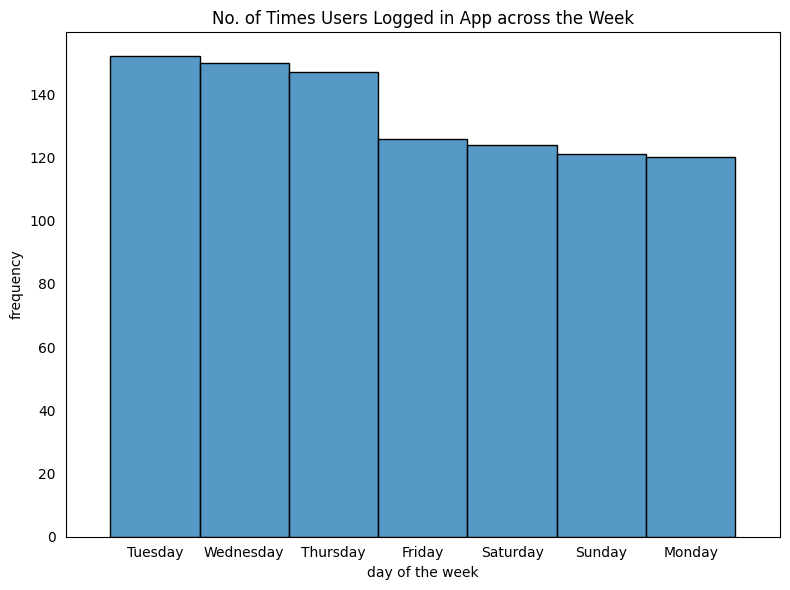

In [682]:
plt.style.use('default')
plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.histplot(daily_activity['dayofweek'], bins = np.arange(8) - 0.5, edgecolor = 'black', linewidth = 1)
ax.set(title = 'No. of Times Users Logged in App across the Week', xlabel = 'day of the week', ylabel = 'frequency')

plt.tick_params(left = False, bottom = False)
plt.xticks(range(7))
plt.xlim([-1, 7])
plt.show()

***Findings***

* We discovered that users prefer or remember to track their activity on the app during midweek from Tuesday to Thursday.

* Noting that the frequency dropped on Friday and continue on weekends and Monday.

***Recommendations***

* Adding feature of reminding consumer to wear the tracker in case of no-use may attract consumers who often forget to put on the gadget.

* Rewards-program to incentivize consistent users may encourage regular use of Bellabeat app.

* On weekends, Bellabeat app can also prompt notification to encourage users to exercise.


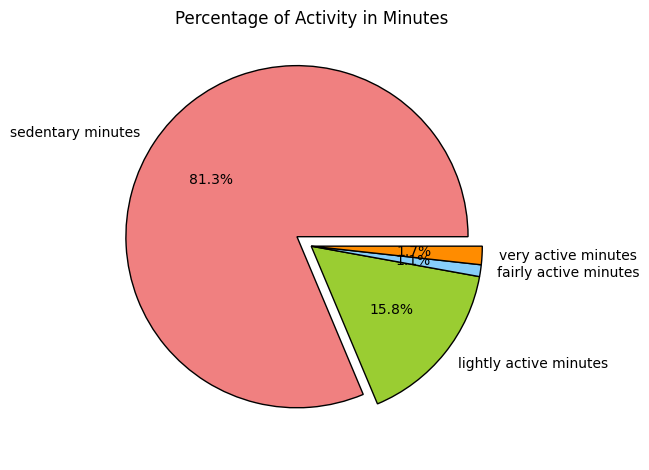

In [683]:
sedentary_minutes = daily_activity['sedentaryminutes'].sum()
lightly_active_minutes = daily_activity['lightlyactiveminutes'].sum()
fairly_active_minutes = daily_activity['fairlyactiveminutes'].sum()
very_active_minutes = daily_activity['veryactiveminutes'].sum()

slices = [sedentary_minutes, lightly_active_minutes, fairly_active_minutes, very_active_minutes]
labels = ['sedentary minutes', 'lightly active minutes', 'fairly active minutes', 'very active minutes']
colours = ['lightcoral', 'yellowgreen', 'lightskyblue', 'darkorange']
explode = [0.1, 0, 0, 0]

plt.pie(slices, labels = labels, colors = colours, wedgeprops = {'edgecolor': 'black'}, explode = explode, autopct = '%1.1f%%')
plt.title('Percentage of Activity in Minutes')
plt.tight_layout()
plt.show()

***Findings***

* Sedentary minutes takes the biggest slice at 81.3%.

* This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.

* App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

In [684]:
average_sedentary_minutes = daily_activity.groupby(['dayofweek'])['sedentaryminutes'].mean().reset_index()

In [685]:
day_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_sedentary_minutes = average_sedentary_minutes.set_index('dayofweek').reindex(day_of_the_week).reset_index()

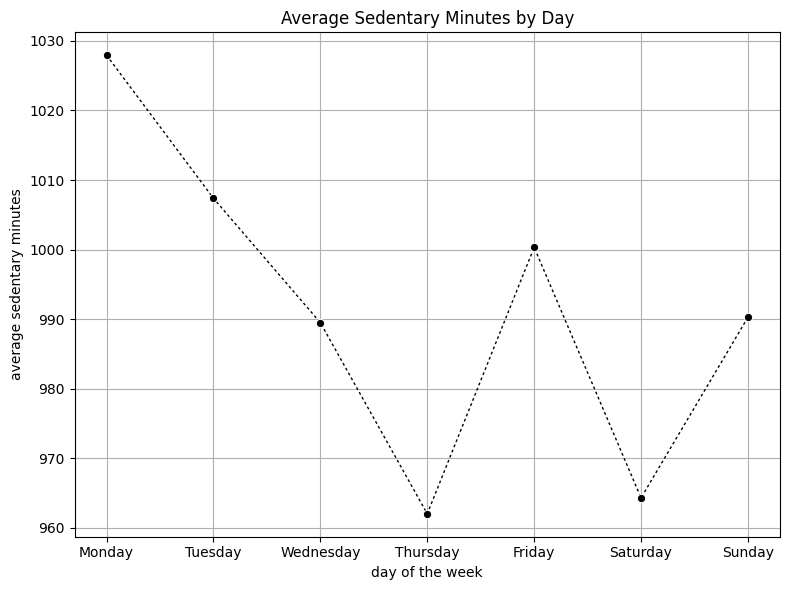

In [686]:
plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.lineplot(x = average_sedentary_minutes['dayofweek'], y = average_sedentary_minutes['sedentaryminutes'],  color = 'black', style = True, dashes = [(2, 2)], marker = 'o', linewidth = 1.0, legend = False)
ax.set(title = 'Average Sedentary Minutes by Day', xlabel = 'day of the week', ylabel = 'average sedentary minutes')

plt.grid(True)
plt.show()

***Finding***

* Spent time seated the most on Mondays, while least on Saturdays.

***Recommendations***

* Adding feature of periodic reminder to take break in case of sensing extended sitting may help improve metabolic health of consumer by cutting down prolonged sedentary time.

* Bellabeat marketing team can encourage users by suggesting different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends).

In [687]:
average_total_intensity = hourly_intensities.groupby(['time'])['totalintensity'].mean().reset_index()

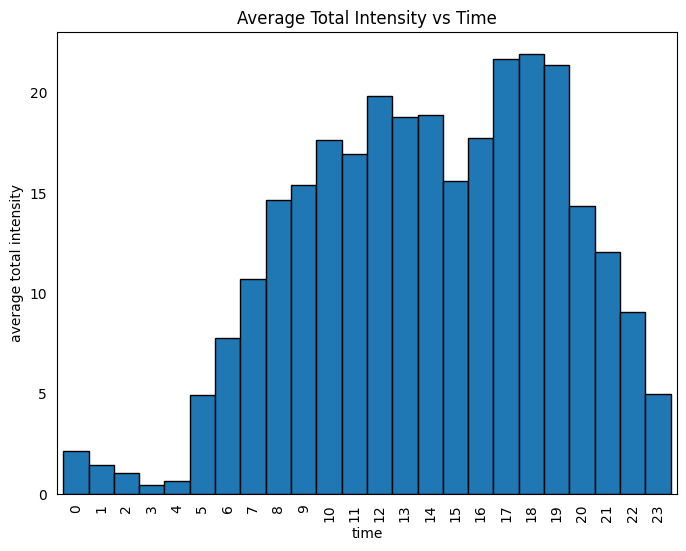

In [688]:
average_total_intensity.plot(figsize = (8, 6), kind = 'bar', edgecolor = 'black', width = 1.0, title = 'Average Total Intensity vs Time', xlabel = 'time', ylabel = 'average total intensity', legend = False)

plt.tick_params(left = False, bottom = False)

***Finding***

* We found out that people are most active between 5 pm and 7 pm.

***Recommendation***

* Bellabeat can use this time to remind and motivate users to go for a run or walk.

In [689]:
# Combining datasets 
daily_activity_and_sleep_day_merged_data = daily_activity.merge(sleep_day, on = ['id', 'date'])

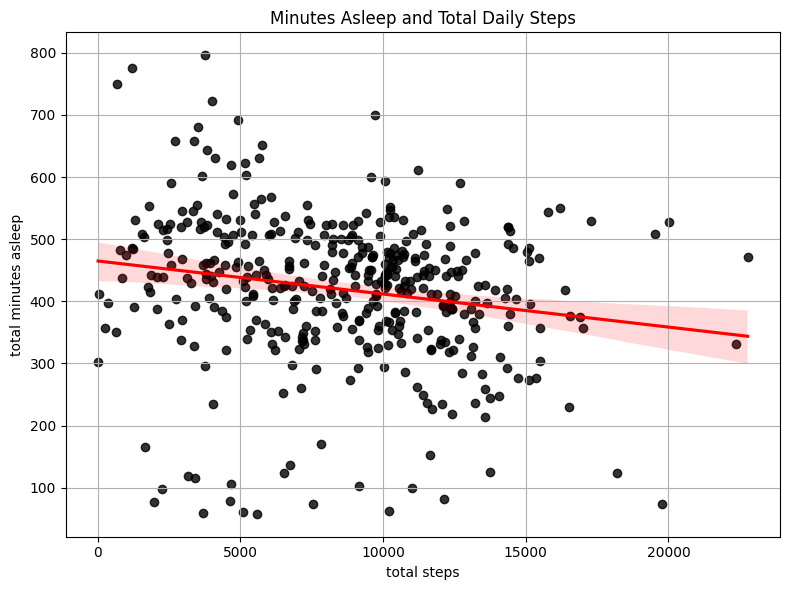

In [690]:
plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.regplot(x = 'totalsteps', y = 'totalminutesasleep', data = daily_activity_and_sleep_day_merged_data, scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
ax.set(title = 'Minutes Asleep and Total Daily Steps', xlabel = 'total steps', ylabel = 'total minutes asleep')

plt.grid(True)
plt.show()

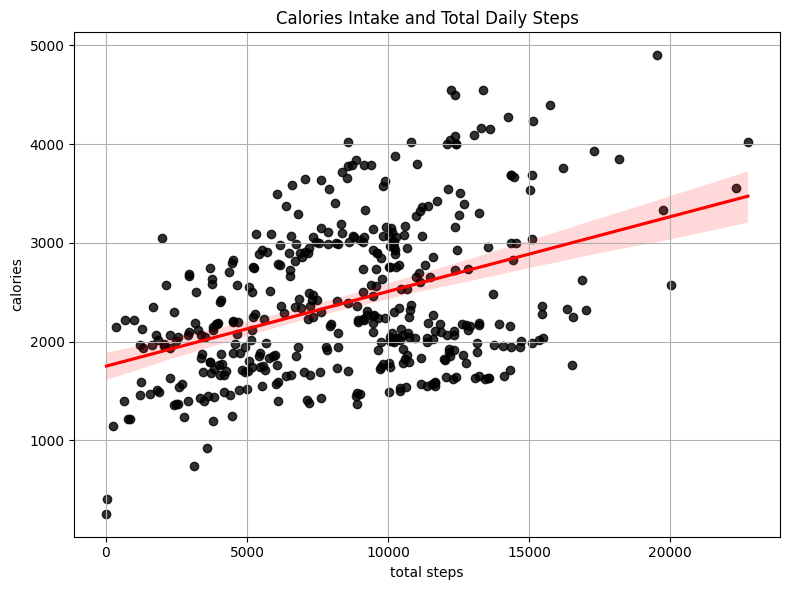

In [691]:
plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.regplot(x = 'totalsteps', y = 'calories', data = daily_activity_and_sleep_day_merged_data, scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
ax.set(title = 'Calories Intake and Total Daily Steps', xlabel = 'total steps', ylabel = 'calories')

plt.grid(True)
plt.show()

In [692]:
# Combining datasets
daily_activity_and_weight_info_merged_data = daily_activity.merge(weight_info, on = ['id', 'date'])

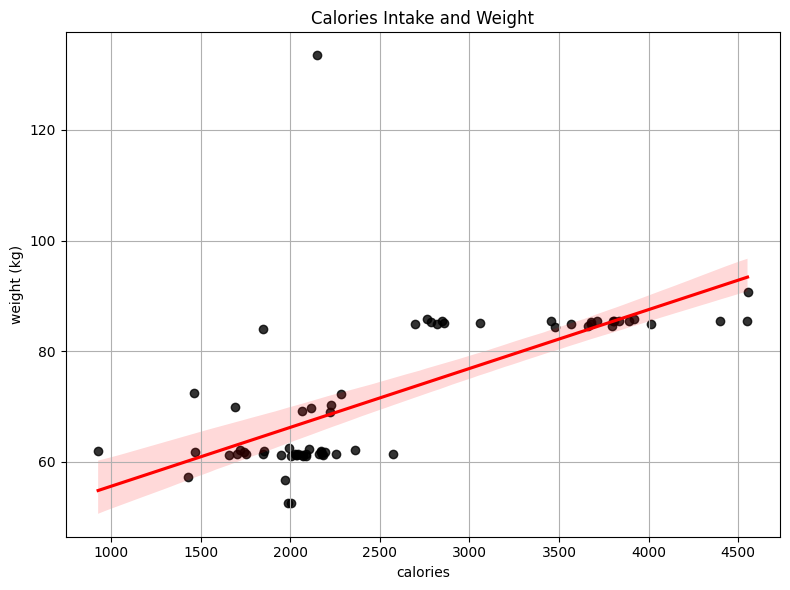

In [693]:
plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.regplot(x = 'calories', y = 'weightkg', data = daily_activity_and_weight_info_merged_data, scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
ax.set(title = 'Calories Intake and Weight', xlabel = 'calories', ylabel = 'weight (kg)')

plt.grid(True)
plt.show()

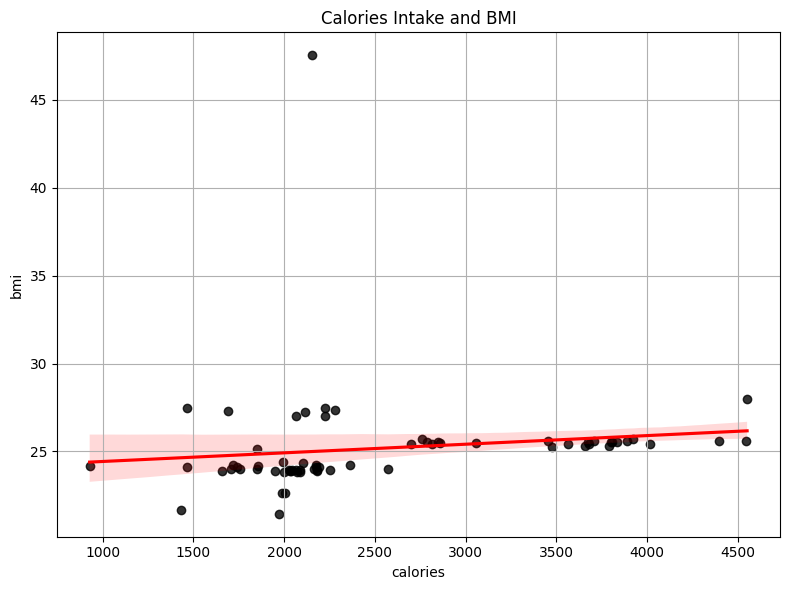

In [694]:
plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.regplot(x = 'calories', y = 'bmi', data = daily_activity_and_weight_info_merged_data, scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
ax.set(title = 'Calories Intake and BMI', xlabel = 'calories', ylabel = 'bmi')

plt.grid(True)
plt.show()

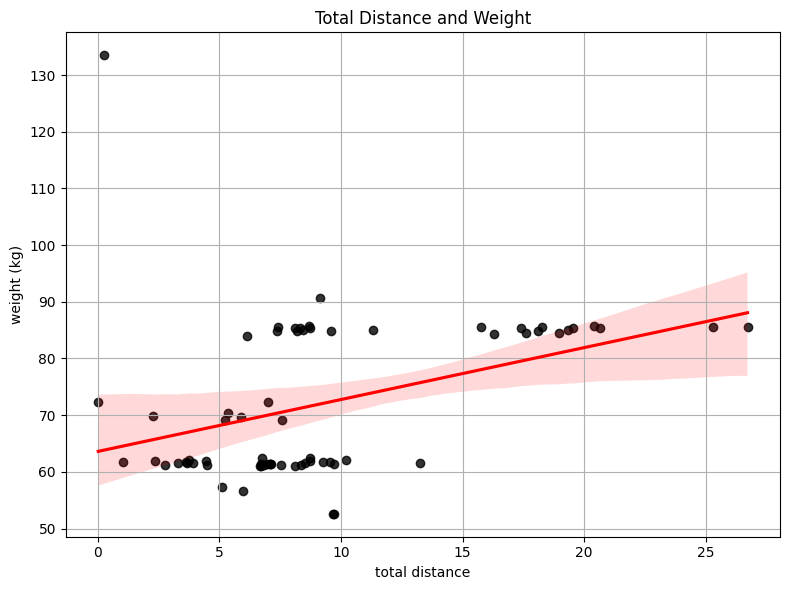

In [695]:
plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.regplot(x = 'totaldistance', y = 'weightkg', data = daily_activity_and_weight_info_merged_data, scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
ax.set(title = 'Total Distance and Weight', xlabel = 'total distance', ylabel = 'weight (kg)')

plt.grid(True)
plt.show()

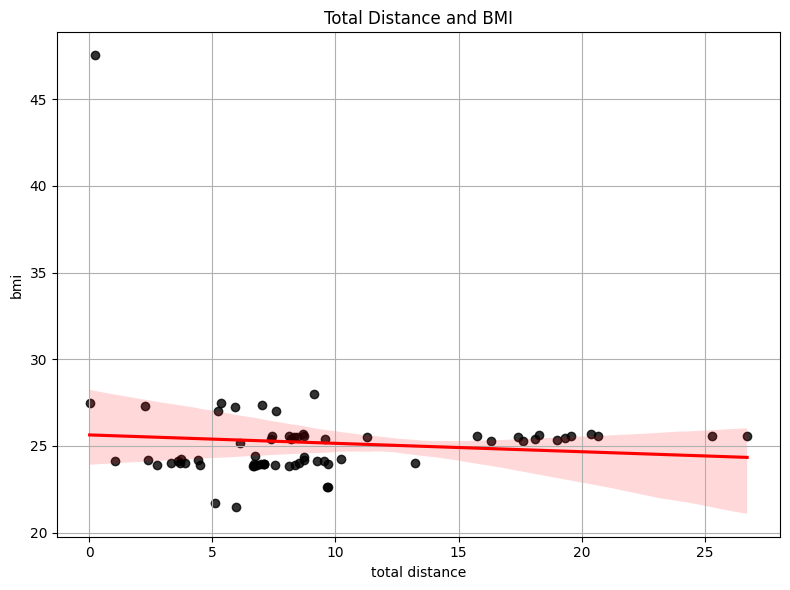

In [696]:
plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.regplot(x = 'totaldistance', y = 'bmi', data = daily_activity_and_weight_info_merged_data, scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
ax.set(title = 'Total Distance and BMI', xlabel = 'total distance', ylabel = 'bmi')

plt.grid(True)
plt.show()

***Recommendations***

* Users who move more through the day and tend to exercise longer, tend to sleep less. Therefore, Bellabeat could offer their customers reminders about upcoming sleep time or even relaxing playlists in order to get ready for bedtime.

* Active users naturally consume more calories, and Bellabeat can use this information for suggesting healthy eating options: e. g. recommend a restaurant based on geolocation.
While users who take in more calories tend to have higher weight, there is no dependency between calories intake and BMI, and this again is all about healthy eating habits. It is well-known that many women tend to eat too little due to their wish to get lower weight, which is in many cases not needed. Bellabeat could highlight the importance of sufficient nutrition in their marketing campains.

* Analysis shows that users with higher weight tend to move more, and there is no dependency between BMI and activity. This insight is an important basis for promoting physical activity among everyone; again, women tend to think that they can not go to the gym due to being overweight, or that they will look not beutiful enough in sports clothes. Bellabeat could show models of every body constitution in marketing campaigns to give a nice example for women and especially young girls, who are very sensitive to such things.